In [1]:
# Fast sorting in NumPy

import numpy as np

In [3]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [4]:
x.sort()  # sort in place
print(x)

[1 2 3 4 5]


In [5]:
# argsort returns the indices of the sorted elements
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


In [7]:
x[i]  # can construct the sorted array with fancy indexing

array([1, 2, 3, 4, 5])

In [8]:
# sort along rows or columns

rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [9]:
# sort each column of X
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [10]:
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

In [12]:
## Partial Sorting - Partitioning

In [13]:
# partition returns the smallest K values to the left of the partition, and the rest to the right in arbitrary order

x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

In [14]:
# arbitrary axis paritioning

np.partition(X, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

In [15]:
## Example: K-nearest Neighbors

In [20]:
X = rand.rand(10, 2)

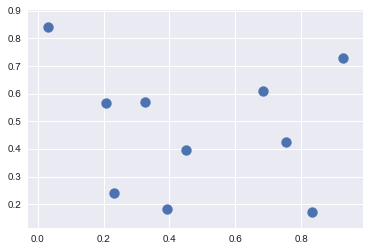

In [21]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

plt.scatter(X[:, 0], X[:, 1], s=100)

In [22]:
# compute distance bewteen each pair of points

dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) **2, axis=-1)

In [27]:
print(X[:, np.newaxis, :].shape)
print(X[:, np.newaxis, :])

print(X[np.newaxis, :, :].shape)
print(X[np.newaxis, :, :])

(10, 1, 2)
[[[0.23089383 0.24102547]]

 [[0.68326352 0.60999666]]

 [[0.83319491 0.17336465]]

 [[0.39106061 0.18223609]]

 [[0.75536141 0.42515587]]

 [[0.20794166 0.56770033]]

 [[0.03131329 0.84228477]]

 [[0.44975413 0.39515024]]

 [[0.92665887 0.727272  ]]

 [[0.32654077 0.57044397]]]
(1, 10, 2)
[[[0.23089383 0.24102547]
  [0.68326352 0.60999666]
  [0.83319491 0.17336465]
  [0.39106061 0.18223609]
  [0.75536141 0.42515587]
  [0.20794166 0.56770033]
  [0.03131329 0.84228477]
  [0.44975413 0.39515024]
  [0.92665887 0.727272  ]
  [0.32654077 0.57044397]]]


In [34]:
# wtf

differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape
print(differences)

[[[ 0.          0.        ]
  [-0.45236969 -0.36897119]
  [-0.60230109  0.06766081]
  [-0.16016678  0.05878938]
  [-0.52446758 -0.18413041]
  [ 0.02295216 -0.32667486]
  [ 0.19958053 -0.60125931]
  [-0.21886031 -0.15412477]
  [-0.69576504 -0.48624653]
  [-0.09564694 -0.32941851]]

 [[ 0.45236969  0.36897119]
  [ 0.          0.        ]
  [-0.14993139  0.436632  ]
  [ 0.29220291  0.42776057]
  [-0.07209789  0.18484078]
  [ 0.47532186  0.04229633]
  [ 0.65195023 -0.23228812]
  [ 0.23350939  0.21484642]
  [-0.24339535 -0.11727534]
  [ 0.35672275  0.03955268]]

 [[ 0.60230109 -0.06766081]
  [ 0.14993139 -0.436632  ]
  [ 0.          0.        ]
  [ 0.4421343  -0.00887143]
  [ 0.0778335  -0.25179122]
  [ 0.62525325 -0.39433567]
  [ 0.80188162 -0.66892012]
  [ 0.38344078 -0.22178558]
  [-0.09346395 -0.55390734]
  [ 0.50665414 -0.39707932]]

 [[ 0.16016678 -0.05878938]
  [-0.29220291 -0.42776057]
  [-0.4421343   0.00887143]
  [ 0.          0.        ]
  [-0.3643008  -0.24291979]
  [ 0.18311894

In [28]:
# square the coordinate differences
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [29]:
# sum coordinate differences to get squared distance

dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [30]:
# diagonal (distance from each point to itself) should be 0
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [31]:
# argsort to sort along each row, left-most columns will give indices of nearest neighbor

nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 7 5 9 4 1 2 6 8]
 [1 4 8 7 9 2 5 3 0 6]
 [2 4 3 7 1 8 0 9 5 6]
 [3 0 7 9 5 4 2 1 6 8]
 [4 1 2 7 8 3 9 0 5 6]
 [5 9 7 6 0 3 1 4 8 2]
 [6 5 9 7 0 1 3 4 8 2]
 [7 9 3 0 5 4 1 2 8 6]
 [8 1 4 2 7 9 5 3 0 6]
 [9 5 7 0 1 3 6 4 8 2]]


In [32]:
K = 2
nearest_partition = np.argpartition(dist_sq, K+1, axis=1)

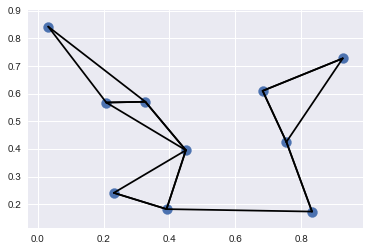

In [33]:
plt.scatter(X[:, 0], X[:, 1], s=100)

# draw lines from each point to its 2 nearest neighbors
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen
        plt.plot(*zip(X[j], X[i]), color='black')